Respondendo as perguntas do CEO

In [1]:
import pandas as pd 

# recurso nativo do Pandas para forçar de que não seja exibido numeros com notacao científica. Dessa forma ele exibe o float na forma "comum", "human readable".
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data = pd.read_csv('datasets/kc_house_data.csv')

from matplotlib import pyplot as plt
# tive de colocar a linha abaixo para que o pyplot bar fosse exibido no Android!
%matplotlib inline

In [3]:
#1.	Qual o número de imóveis por ano de construção?

data[['id','yr_built']].groupby('yr_built').count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


In [13]:
# 2.	Qual o menor número de quartos por ano de construção?

data[['bedrooms','yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
...,...
2011,1
2012,2
2013,2


In [7]:
# 3.	Qual o preço de compra mais alto por cada número de quarto?

data[['price','bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.000
1,1247000.000
2,3278000.000
3,3800000.000
4,4489000.000
5,7062500.000
6,7700000.000
7,3200000.000
8,3300000.000


In [7]:
#4.	Qual a soma de todos os preços de compra por número de quartos? 

data[['price','bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.000
1,63210934.000
2,1107788602.000
3,4580263939.000
4,4372957028.000
5,1259346326.000
6,224541613.000
7,36145017.000
8,14366000.000


In [8]:
#5.	Qual a soma de todos os preços de compra por número de quartos e banheiros?

data[['price','bedrooms','bathrooms',]].groupby(['bathrooms','bedrooms']).sum()

price
bathrooms bedrooms            
0.000     0        3642600.000
          1         839000.000
0.500     1         255000.000
          2         382000.000
          4         312500.000
...                        ...
6.750     7         800000.000
7.500     9         450000.000
7.750     6        6885000.000
8.000     6        7700000.000
          7        2280000.000

[144 rows x 1 columns]

In [11]:
#6.	Qual o tamanho médio das salas dos imóveis por ano de consturção?


#data.columns
#sqft_lot, , yr_built
yr_built
data[['sqft_living','yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.011
1901,1763.621
1902,1919.630
1903,1507.739
1904,1603.178
...,...
2011,2313.685
2012,2378.741
2013,2636.592


In [12]:
#7.	Qual o tamanho mediano das salas dos imóveis por ano de construção?

data[['sqft_living','yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540.000
1901,1610.000
1902,1600.000
1903,1505.000
1904,1280.000
...,...
2011,2270.000
2012,2237.500
2013,2580.000


In [7]:
# 8.	Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?

data[['sqft_living','yr_built']].groupby('yr_built').std()
#

,sqft_living
yr_built,
1900,732.944
1901,668.232
1902,878.659
1903,469.723
1904,1076.871
...,...
2011,804.864
2012,771.430
2013,883.499


In [3]:
from matplotlib import pyplot as plt
# tive de colocar a linha abaixo para que o pyplot bar fosse exibido no Android!
%matplotlib inline

   year          price
0  2014 7889841842.000
1  2015 3783083166.000


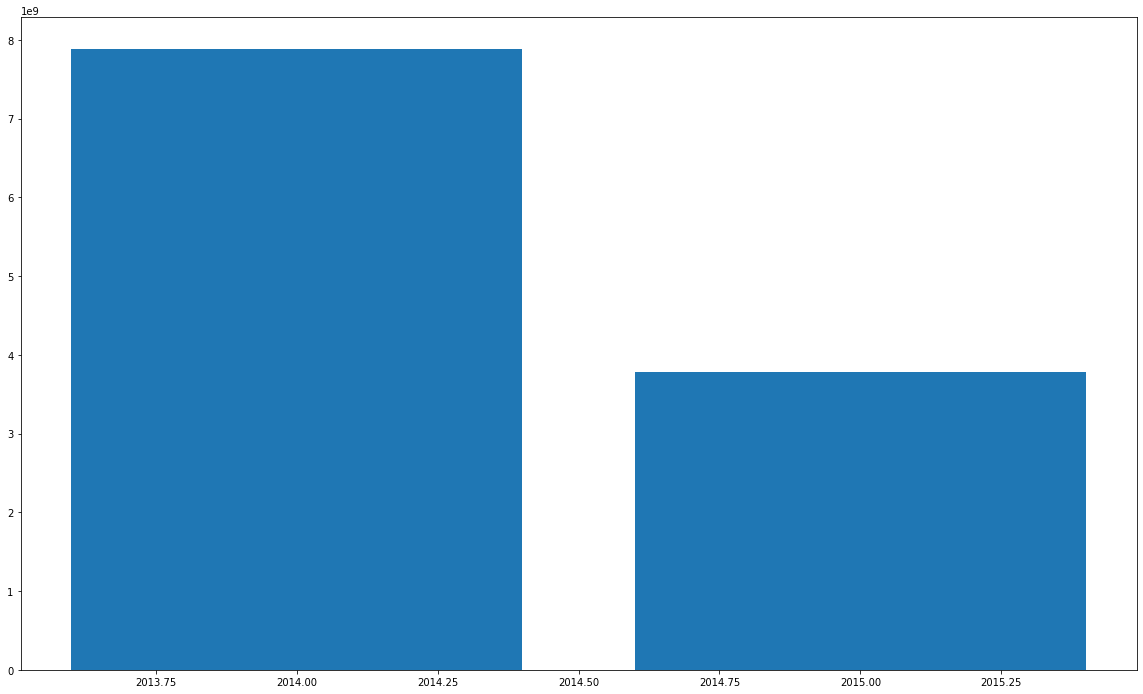

In [8]:
#9.	Como é o crescimento médio dos preços de compras dos imóveis, por ano, por dia e pela semana do ano?

# Crescimento total de preços de compras de imóveis por ano.
# Eixo X: Anos
# Eixo Y: Soma dos preços
# Gráfico: Barras

by_year = data[['price','year']].groupby('year').sum().reset_index()
print(by_year)
#print('\n')
# Verificar depois porque a formatação/estilo de tabela não está sendo exibida.
# Repare de que só acontece dentro da celula do notebook que usa a função "pyplot".

# First Graph
data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['price','year']].groupby('year').sum().reset_index()

plt.figure(figsize=(20,12))
plt.bar(by_year['year'],by_year['price']);

#testando
#

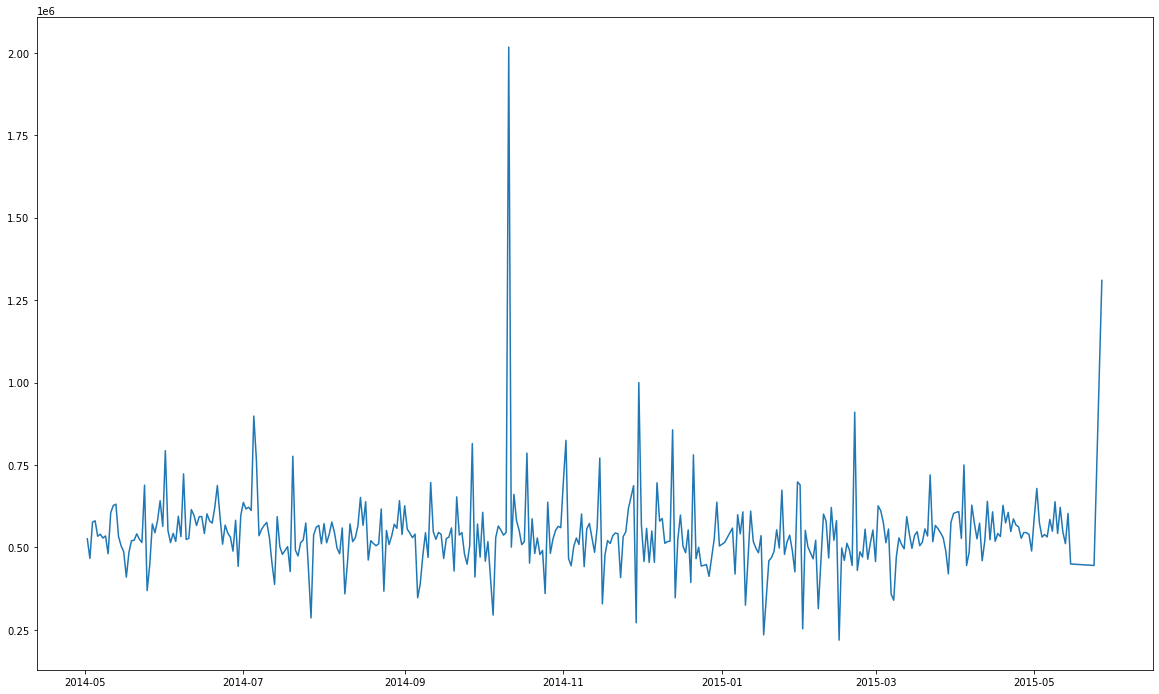

In [14]:
#  Second Graph
data['day'] = pd.to_datetime(data['date'])
by_day = data[['price','day']].groupby('day').mean().reset_index()

plt.figure(figsize=(20,12))
plt.plot(by_day['day'],by_day['price']);


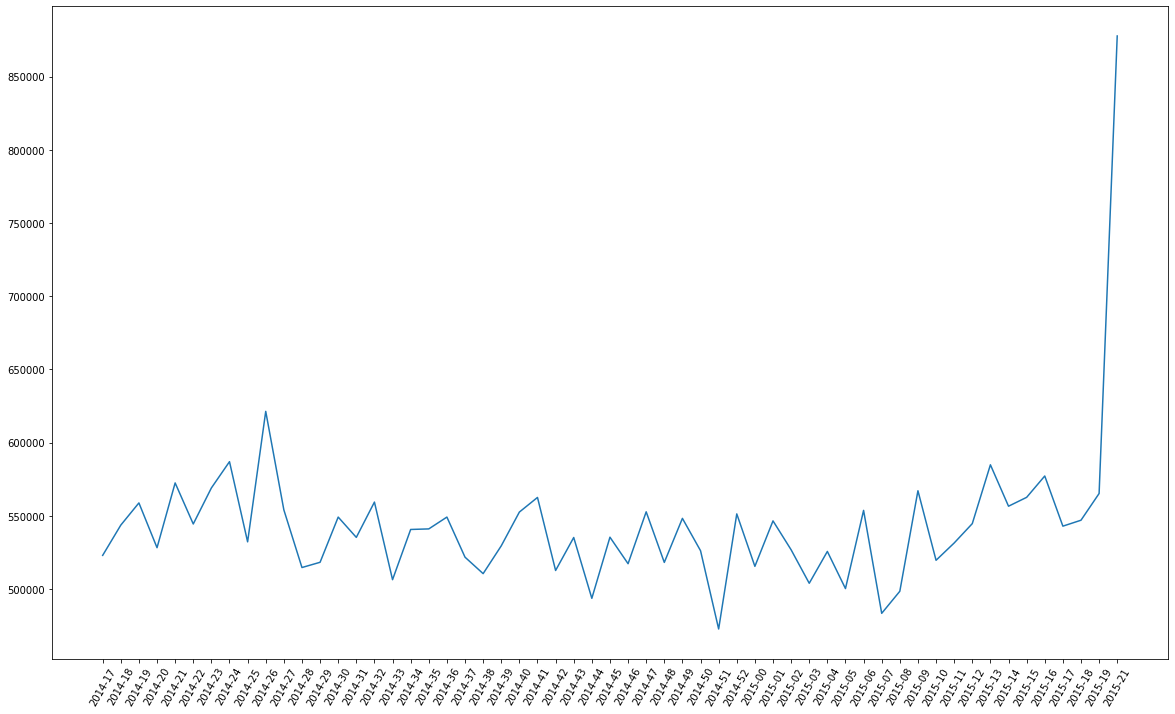

In [13]:
# Third Graph
# dt.strftime(%Parametro1-%Parametro2)
# %Parametro1 = %Y = Exibe o ano da data em questão
# %Parametro2 = %W = Exibe a semana do ano, começada na segunda.
# %Parametro2 = %U = Exibe a semana do ano, começada no domingo.
#
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_year_week = data[['price','year_week']].groupby('year_week').mean().reset_index()

plt.figure(figsize=(20,12))
plt.plot(by_year_week['year_week'], by_year_week['price'])
plt.xticks(rotation=60);
#
#

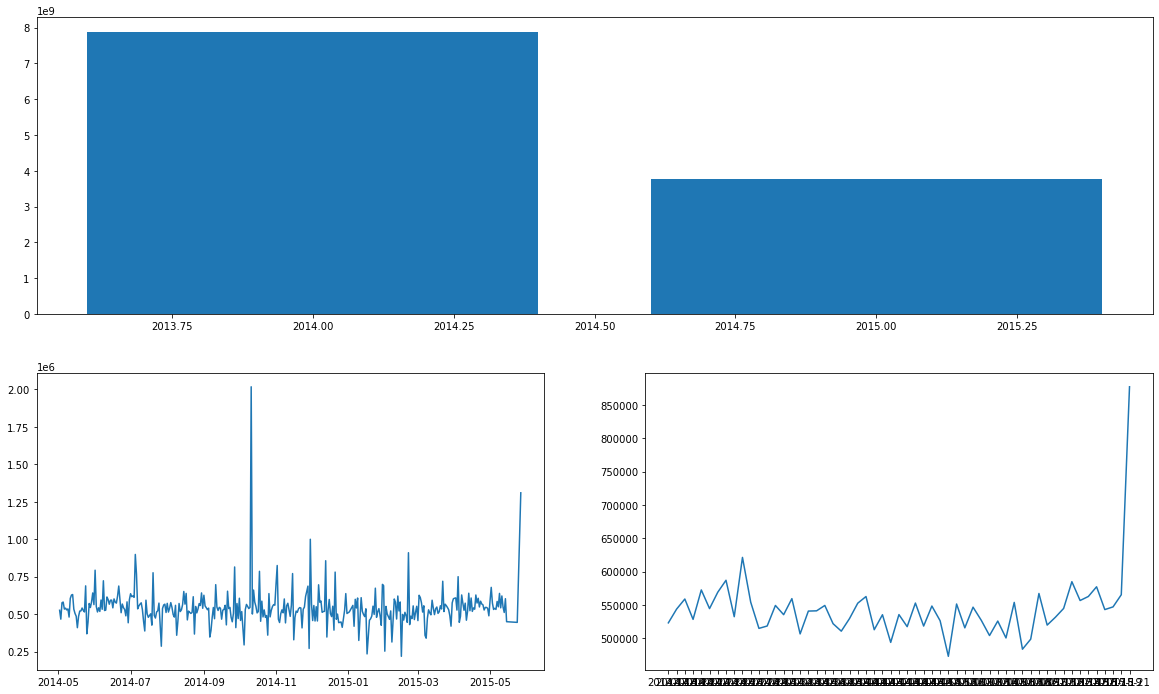

In [7]:
# Plus da resposta 9, dashboard simples que o Meigarom mostrou.
#

from matplotlib import gridspec as gs

fig = plt.figure(figsize=(20,12))
specs = gs.GridSpec(ncols=2,nrows=2,figure=fig)

ax1 = fig.add_subplot(specs[0,:])
ax2 = fig.add_subplot(specs[1,0])
ax3 = fig.add_subplot(specs[1,1])

# Inserir gráficos contendo as mensagens: volume de preço por ano,
# volume de preço por ano-dia e volume de preço por ano-semana.
#

# First Graph - Price volume by year
#
data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['year','price']].groupby('year').sum().reset_index()

# comando "figure" para determinar o tamanho do gráfico.
#plt.figure(figsize=(20,12))
# comando "bar" para criar o gráfico em si. Seguindo a ordem dos eixos X e Y.
#plt.bar(by_year['year'],by_year['price'])

ax1.bar(by_year['year'],by_year['price']);
#

# Second Graph - Price volume by year-day
data['day'] = pd.to_datetime(data['date'])
by_day = data[['day','price']].groupby('day').mean().reset_index()
#print(by_day)

ax2.plot(by_day['day'],by_day['price']);

# Third Graph - Price volume by year-week
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_year_week = data[['year_week','price']].groupby('year_week').mean().reset_index()

ax3.plot(by_year_week['year_week'],by_year_week['price']);
#
#

In [3]:
# 10.	Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

import plotly.express as px

house = data[['id','lat','long','price']]

fig = px.scatter_mapbox ( house,
                            lat = 'lat',
                            lon = 'long',
                            size = 'price',
                            color_continuous_scale = px.colors.cyclical.IceFire,
                            size_max = 15,
                            zoom= 10 )

#fig.update_layout ( mapbox_style = 'open-street-map' )
#fig.update_layout ( height = 600, margin={'r': 0,'t':0,'l':0,'b':0})
#fig.show()

In [ ]:
# Listando abaixo os exercícios a ainda serem feitos.

# Novas perguntas do CEO para você:

# 1. Crie uma nova coluna chamada: "dormitory_type" Se o valor da coluna "bedrooms" for igual à 1 ='studio' Se o valor da coluna "bedrooms" for igual a 2 'apartament' Se o valor da coluna "bedrooms" for maior que 2 "house'

# 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

# 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

# 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

# 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

# 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

# 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )

# 8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

# 9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas)

# 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

# Novas perguntas do CEO para você:

In [8]:

# Q1

# Verificar meio de resolver essa mesma questão já feita antes
# usando o comando "select" da Lib "numpy", usando condicao if/else.
#
# Usando condicionador if etc, criando uma função para está finalidade

def Q1Select(data):
    if (data['bedrooms'] == 1):
        return 'Studio'
    elif (data['bedrooms'] == 2):
        return 'Apartment'
    elif (data['bedrooms'] > 2):
        return 'House'
#

data['dormitory_type'] = data.apply(Q1Select,axis=1)

#data.head()

<BarContainer object of 13 artists>

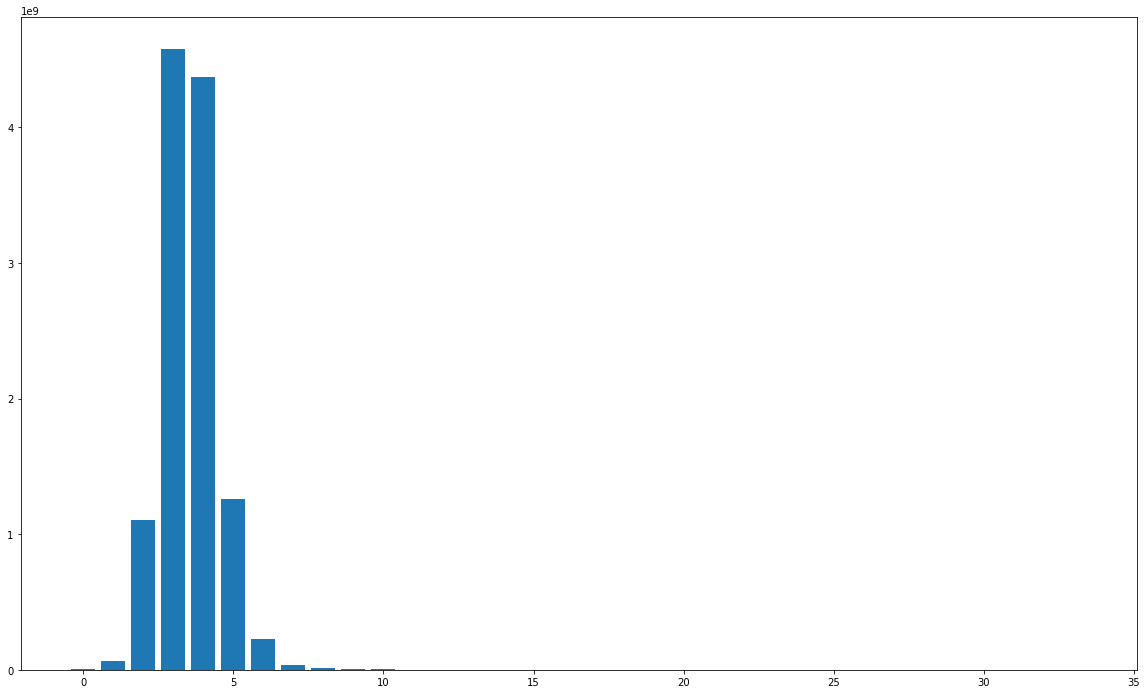

In [20]:
# Q2
# 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

q2_bedrooms_value = data[['bedrooms','price']].groupby('bedrooms').sum().reset_index()

# print(q2_bedrooms_value)

plt.figure(figsize=(20,12))
plt.bar(q2_bedrooms_value['bedrooms'],q2_bedrooms_value['price'])

     yr_built      price
0        1900 581387.207
1        1901 556935.931
2        1902 673007.407
3        1903 480958.196
4        1904 583756.644
..        ...        ...
111      2011 544522.000
112      2012 527447.335
113      2013 678545.453
114      2014 683681.755
115      2015 759785.158

[116 rows x 2 columns]


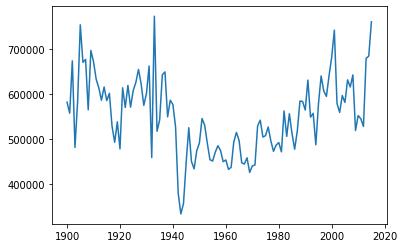

In [4]:
# Q3
# 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.
# price mean by yr_built

q3_pmean_yrbuilt = data[['yr_built','price']].groupby('yr_built').mean().reset_index()

print(q3_pmean_yrbuilt)


plt.plot(q3_pmean_yrbuilt['yr_built'],q3_pmean_yrbuilt['price']);

  dormitory_type      price
0      Apartment 401372.682
1          House 563092.212
2         Studio 317642.884


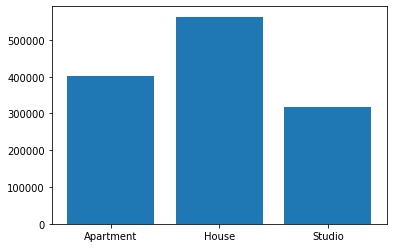

In [11]:

# 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

q4_pmean_dormtype = (data[['dormitory_type','price']].groupby('dormitory_type').mean().reset_index())
#.reset_index()).sort_values('price', ascending=True)


print(q4_pmean_dormtype)

#plt.figure(figsize=(20,12))
plt.bar(q4_pmean_dormtype['dormitory_type'],q4_pmean_dormtype['price']);
#plt.show()

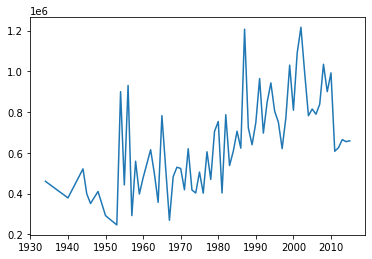

In [12]:
# 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

#price mean by yr_renovated > 1930

q5filter = data[data['yr_renovated'] > 1930]
q5_pmean_yrrenov = q5filter[['yr_renovated','price']].groupby('yr_renovated').mean().reset_index()

plt.plot(q5_pmean_yrrenov['yr_renovated'],q5_pmean_yrrenov['price']);
